<a href="https://colab.research.google.com/github/egeoguzman/svm_tesla_stock_prediction/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Program Description:  This program written to decide which Support Vector Regression Algorithm 
#                       is better to predict TESLA stock prices for a specific day.


In [0]:
#Import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

In [2]:
#Upload the data
#Getting the data from GitHub repo with raw link of .csv file.

url = 'https://raw.githubusercontent.com/egeoguzman/svm_tesla_stock_prediction/master/TSLA.csv'
df = pd.read_csv(url)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-11-07,329.140015,341.500000,328.019989,335.540009,335.540009,14467300
1,2019-11-08,334.500000,337.459991,332.500000,337.140015,337.140015,6069200
2,2019-11-11,343.950012,349.190002,342.000000,345.089996,345.089996,9986700
3,2019-11-12,346.899994,350.369995,344.040009,349.929993,349.929993,7359400
4,2019-11-13,355.000000,356.329987,345.179993,346.109985,346.109985,8420100
5,2019-11-14,346.109985,353.839996,342.910004,349.350006,349.350006,6464900
6,2019-11-15,350.640015,352.799988,348.359985,352.170013,352.170013,4809000
7,2019-11-18,352.920013,353.149994,346.100006,349.989990,349.989990,4400400
8,2019-11-19,351.750000,359.989990,347.799988,359.519989,359.519989,7724800
9,2019-11-20,360.000000,361.200012,349.570007,352.220001,352.220001,6725100


In [0]:
#X & Y data sets as a lists

dates = []
prices = []

In [4]:
#Will try to predict last 5
df.tail(1)

,Date,Open,High,Low,Close,Adj Close,Volume
20,2019-12-06,335.0,338.859985,334.769989,335.890015,335.890015,7618937


In [5]:
#This dataframe shows rest of the list
df = df.head(len(df)-1)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-11-07,329.140015,341.500000,328.019989,335.540009,335.540009,14467300
1,2019-11-08,334.500000,337.459991,332.500000,337.140015,337.140015,6069200
2,2019-11-11,343.950012,349.190002,342.000000,345.089996,345.089996,9986700
3,2019-11-12,346.899994,350.369995,344.040009,349.929993,349.929993,7359400
4,2019-11-13,355.000000,356.329987,345.179993,346.109985,346.109985,8420100
5,2019-11-14,346.109985,353.839996,342.910004,349.350006,349.350006,6464900
6,2019-11-15,350.640015,352.799988,348.359985,352.170013,352.170013,4809000
7,2019-11-18,352.920013,353.149994,346.100006,349.989990,349.989990,4400400
8,2019-11-19,351.750000,359.989990,347.799988,359.519989,359.519989,7724800
9,2019-11-20,360.000000,361.200012,349.570007,352.220001,352.220001,6725100


In [0]:
#Gets the columns

df_dates = df.loc[:,'Date']
df_open_price = df.loc[:,'Open']


In [7]:
#Pars the data and sets as a independent data set X

for date in df_dates:
  dates.append( [int(date.split('-')[2])])

#Pars the data and sets as a independent data set Y

for open_price in df_open_price:
  prices.append(float(open_price))

print(dates)
print(prices)


[[7], [8], [11], [12], [13], [14], [15], [18], [19], [20], [21], [22], [25], [26], [27], [29], [2], [3], [4], [5]]
[329.140015, 334.5, 343.950012, 346.899994, 355.0, 346.109985, 350.640015, 352.920013, 351.75, 360.0, 354.51001, 340.160004, 344.320007, 335.269989, 331.119995, 331.109985, 329.399994, 332.619995, 337.75, 332.829987]


In [0]:
def predict_prices(dates,prices,x):

  #Defines the SVM regression models.


  svr_lin = SVR(kernel='linear' , C=1e3)
  svr_poly = SVR(kernel='poly' , C=1e3 , degree=2)
  svr_rbf = SVR(kernel='rbf' , C=1e3 , gamma=0.1)



  #Train the models.
  svr_lin.fit(dates,prices)
  svr_poly.fit(dates,prices)
  svr_rbf.fit(dates,prices)


  #Linear Regression Model and train it.

  lin_reg = LinearRegression()
  lin_reg.fit(dates,prices)

  # Data Visualization

  plt.scatter(dates, prices, color='black', label='Data')
  plt.plot(dates, svr_rbf.predict(dates), color='red', label='SVR RBF')
  plt.plot(dates, svr_poly.predict(dates), color='blue', label='SVR Poly')
  plt.plot(dates, svr_lin.predict(dates), color='green', label='SVR Linear')
  plt.plot(dates, lin_reg.predict(dates), color='orange', label='Linear Reg')
  plt.xlabel('Days')
  plt.ylabel('Price')
  plt.title('Regression')
  plt.legend()
  plt.show()

  return svr_rbf.predict(x)[0], svr_lin.predict(x)[0],svr_poly.predict(x)[0],lin_reg.predict(x)[0]









/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


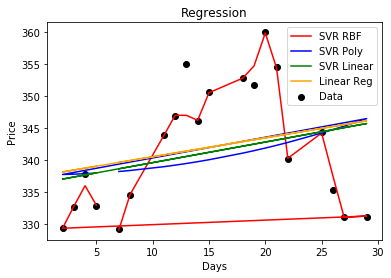

(328.1459632229059, 338.2947625714186, 338.05919564013584, 339.312784188827)


In [14]:
predicted_price = predict_prices(dates,prices,[[6]])
print(predicted_price)